In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [51]:
dataset = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [52]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
dataset.shape

(768, 9)

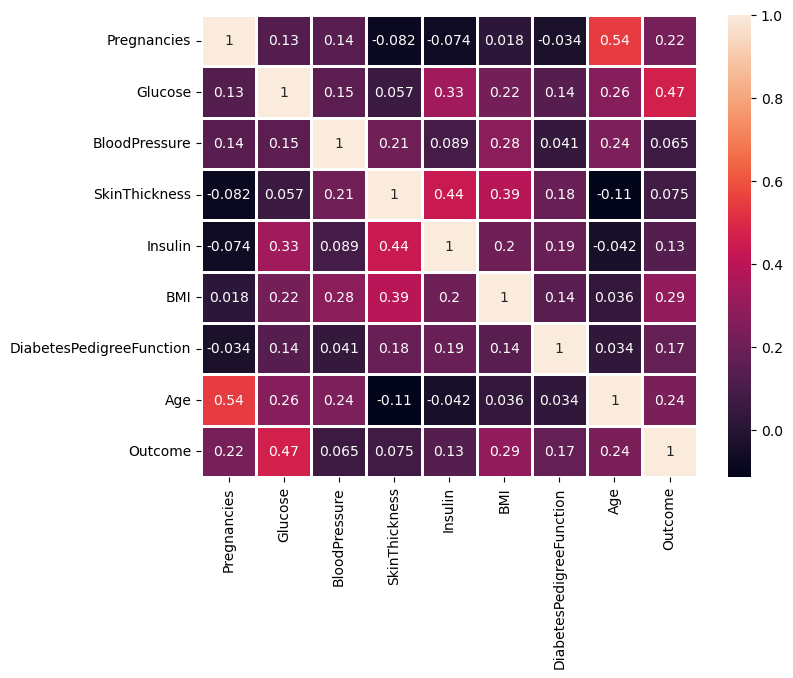

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(dataset.corr(), annot=True, linewidths=2)
plt.show()

In [55]:
dataset.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
zero_not_accepted = ["Glucose", "BloodPressure", "SkinThickness",
                    "Insulin", "BMI"]
for col in zero_not_accepted:
    dataset[col].replace(0, np.nan, inplace=True)    
dataset.head(n=10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


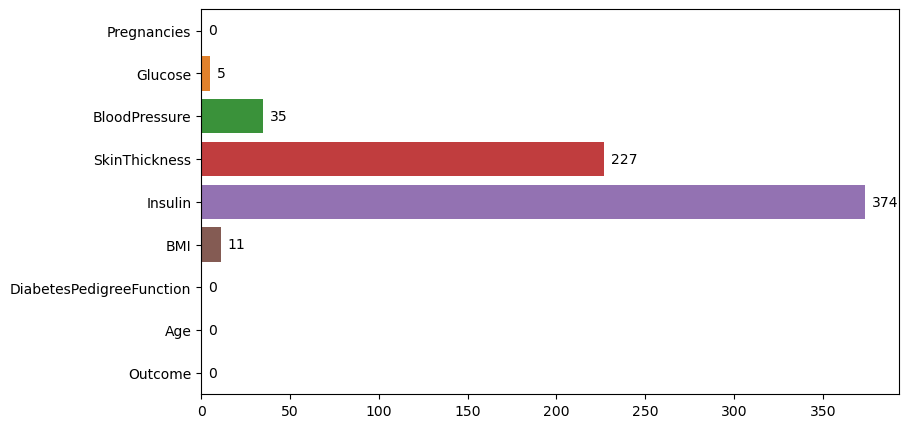

In [59]:
plt.figure(figsize=(9,5))
ax = sns.barplot(x=dataset.isna().sum(),
           y=dataset.columns, orient='h')
for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}", 
                xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', 
                ha="left", va="center",
               )
plt.grid(False)
plt.show()

In [60]:
for col in zero_not_accepted:
    dataset[col].replace(np.nan, dataset[col].mean(), inplace=True)

In [61]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

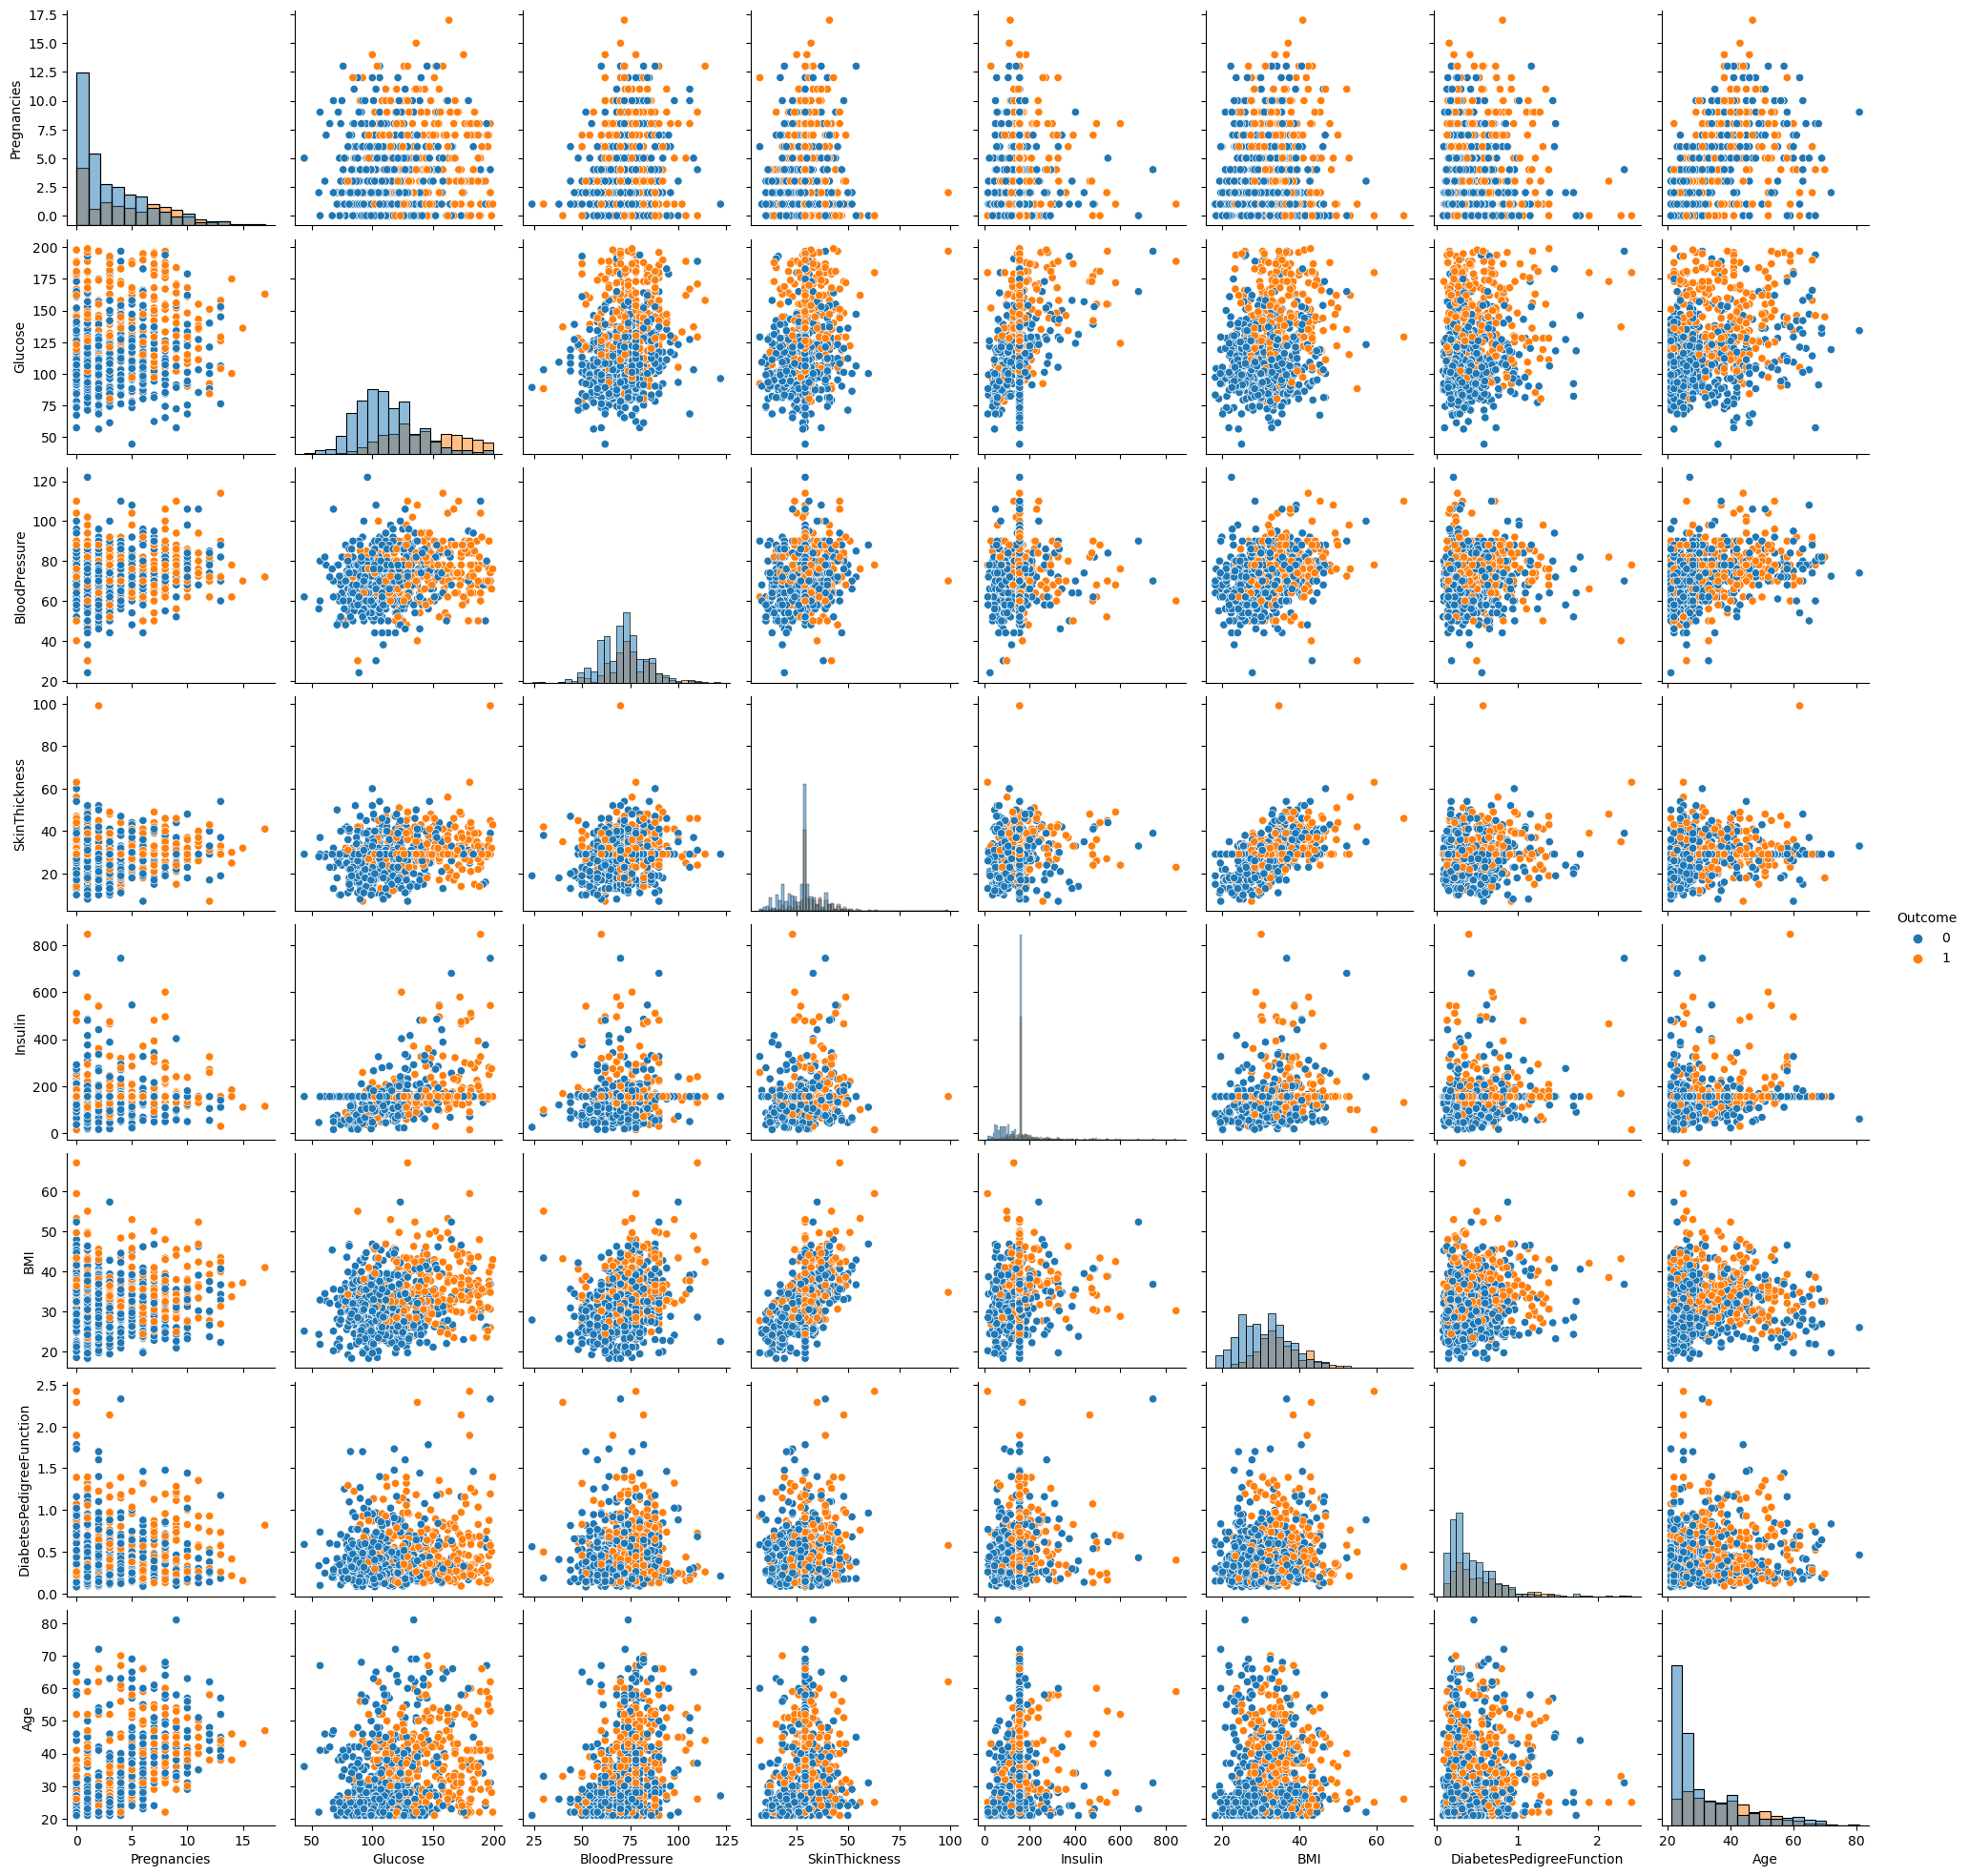

In [62]:
plt.figure(figsize=(20,20))
sns.pairplot(data=dataset, hue="Outcome", diag_kind="hist")
plt.show()

In [64]:
dataset["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [66]:
X = dataset.iloc[:, :-1].to_numpy()
y = dataset.iloc[:, -1].to_numpy()

In [67]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [68]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [69]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=0)
X_r, y_r = smk.fit_resample(X, y)

In [70]:
from collections import Counter
print(f"Initial counts: {Counter(y)}")
print(f"Resampled Counts: {Counter(y_r)}")

Initial counts: Counter({0: 500, 1: 268})
Resampled Counts: Counter({1: 479, 0: 479})


In [71]:
print(X_r.shape, y_r.shape)

(958, 8) (958,)


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [73]:
print(X_train.shape)
print(X_train)

(614, 8)
[[7.00000000e+00 1.50000000e+02 7.80000000e+01 ... 3.52000000e+01
  6.92000000e-01 5.40000000e+01]
 [4.00000000e+00 9.70000000e+01 6.00000000e+01 ... 2.82000000e+01
  4.43000000e-01 2.20000000e+01]
 [0.00000000e+00 1.65000000e+02 9.00000000e+01 ... 5.23000000e+01
  4.27000000e-01 2.30000000e+01]
 ...
 [4.00000000e+00 9.40000000e+01 6.50000000e+01 ... 2.47000000e+01
  1.48000000e-01 2.10000000e+01]
 [1.10000000e+01 8.50000000e+01 7.40000000e+01 ... 3.01000000e+01
  3.00000000e-01 3.50000000e+01]
 [5.00000000e+00 1.36000000e+02 8.20000000e+01 ... 3.24574637e+01
  6.40000000e-01 6.90000000e+01]]


In [74]:
print(y_train.shape)
print(y_train)

(614,)
[1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 0 0

In [75]:
print(X_test.shape)
print(X_test)

(154, 8)
[[1.000e+00 1.990e+02 7.600e+01 ... 4.290e+01 1.394e+00 2.200e+01]
 [2.000e+00 1.070e+02 7.400e+01 ... 3.360e+01 4.040e-01 2.300e+01]
 [4.000e+00 7.600e+01 6.200e+01 ... 3.400e+01 3.910e-01 2.500e+01]
 ...
 [4.000e+00 1.420e+02 8.600e+01 ... 4.400e+01 6.450e-01 2.200e+01]
 [3.000e+00 1.160e+02 7.400e+01 ... 2.630e+01 1.070e-01 2.400e+01]
 [1.000e+00 1.070e+02 7.200e+01 ... 3.080e+01 8.210e-01 2.400e+01]]


In [76]:
print(y_test.shape)
print(y_test)

(154,)
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0]


In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
pd.DataFrame(X_train, columns=dataset.columns[:-1]).describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,-2.748435e-17,5.062906e-16,-8.679268e-16,6.046557e-15,-6.130456e-15,-4.814101e-15,1.583243e-15,-3.471707e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.126063e+00,-2.569188e+00,-4.053128e+00,-2.519843e+00,-1.637603e+00,-2.064725e+00,-1.166818e+00,-1.048981e+00
25%,-8.354355e-01,-7.503177e-01,-7.203866e-01,-4.827233e-01,-4.147189e-01,-7.196809e-01,-6.862388e-01,-7.991138e-01
50%,-2.541807e-01,-1.219805e-01,-2.007885e-02,-1.266707e-02,-1.227855e-02,-2.462752e-02,-2.927647e-01,-3.826685e-01
75%,6.177016e-01,6.386382e-01,6.127101e-01,3.943698e-01,-1.227855e-02,5.931678e-01,4.205946e-01,6.168003e-01
max,3.814603e+00,2.523650e+00,4.112089e+00,7.892101e+00,7.915817e+00,4.932365e+00,5.867657e+00,3.948363e+00


In [79]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [82]:
def disp_cm(y_test, y_pred)->float:
    """Displays the confusion matrix in the form of heatmap.
    
    Parameters:
    y_test (array-like): list of true labels
    y_pred (array-like): list of predicted labels
    
    Returns:
    acc_score (float): Accuracy score 
    """
    acc_score = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(f"Accuracy: {acc_score:0.3f}")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    return acc_score
#function to generate performance report of a classifer
def judge_clf(classifier, X_train=X_train, y_train=y_train,
              X_test=X_test, y_test=y_test)->float:
    """Fits the `classifier` to `X_train`, `y_train` and generate an elegant 
    classification report using `X_test` and `y_test`.
    
    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.
    X_test  (array-like): 2D-array of input features of Testing Set.
    y_test  (array-like): list of target features of Testing Set.
    
    Returns:
    acc_score (float): Accuracy score 
    """
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc_score = disp_cm(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    return acc_score

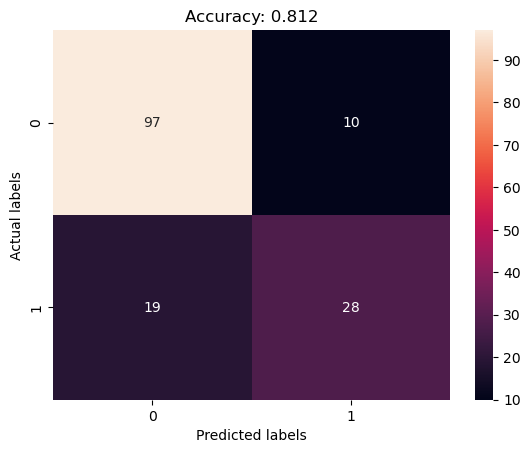

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.60      0.66        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154



In [83]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0)
log_acc = judge_clf(log_clf)


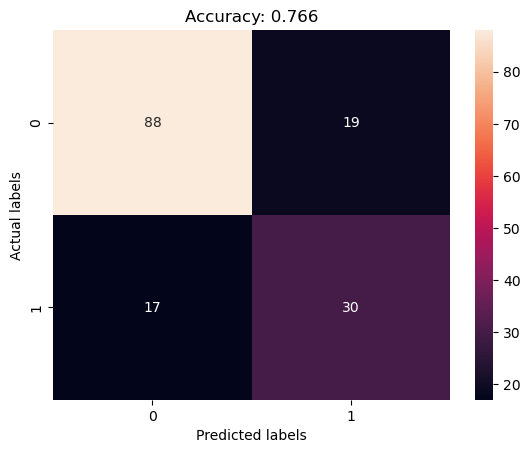

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       107
           1       0.61      0.64      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_acc = judge_clf(knn_clf)

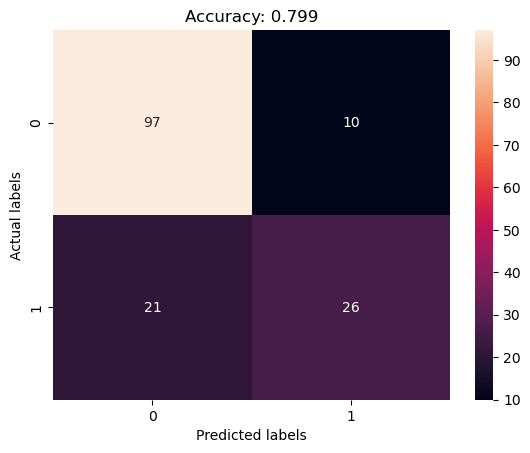

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



In [85]:
from sklearn.svm import SVC
lsvm = SVC(kernel="linear", random_state=0)
lsvm_acc = judge_clf(lsvm)

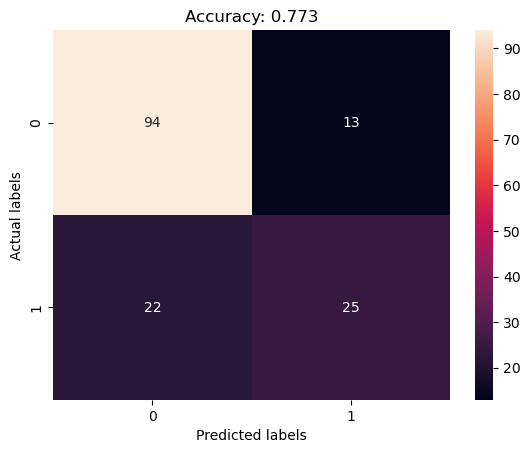

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.66      0.53      0.59        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.77       154



In [86]:
ksvm = SVC(kernel="rbf", random_state=0)
ksvm_acc = judge_clf(ksvm)

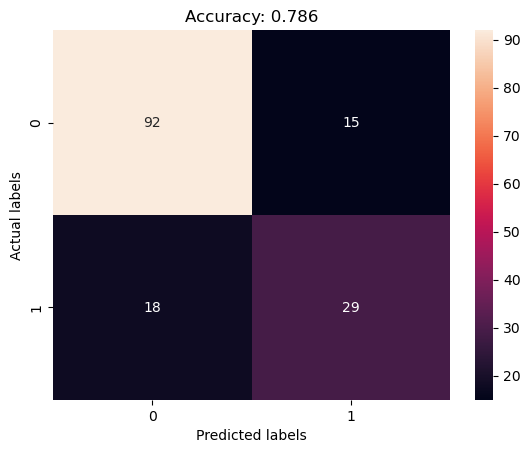

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.66      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.78      0.79      0.78       154



In [87]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
naiveb_acc = judge_clf(nb_clf)

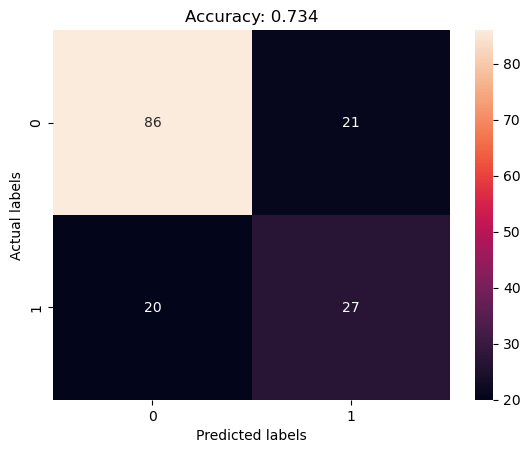

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       107
           1       0.56      0.57      0.57        47

    accuracy                           0.73       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.74      0.73      0.73       154



In [88]:
from sklearn.tree import DecisionTreeClassifier
dtree_clf = DecisionTreeClassifier(criterion="entropy",
                                             random_state=0
                                  )
dtree_acc = judge_clf(dtree_clf)

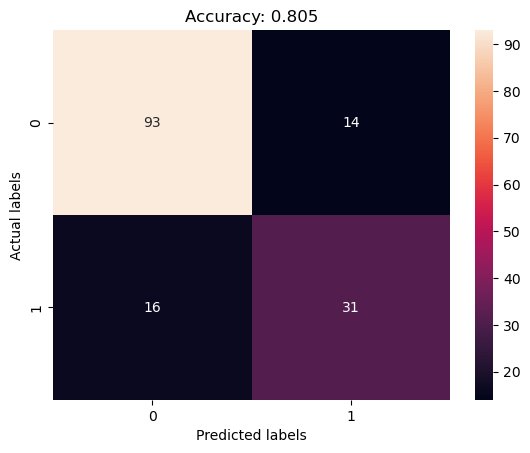

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.69      0.66      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



In [89]:
from sklearn.ensemble import RandomForestClassifier
rfor_clf = RandomForestClassifier(n_estimators=100,
                                            criterion="entropy",
                                            random_state=0)
rfor_acc = judge_clf(rfor_clf)

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


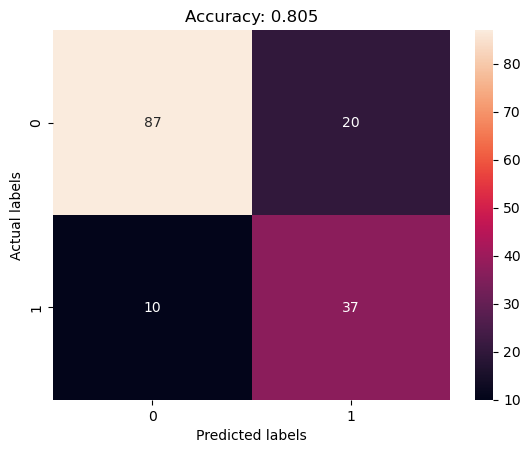

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       107
           1       0.65      0.79      0.71        47

    accuracy                           0.81       154
   macro avg       0.77      0.80      0.78       154
weighted avg       0.82      0.81      0.81       154



In [90]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(use_label_encoder=False,
                       verbosity=0)
xgb_acc = judge_clf(xgb_clf)

In [91]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

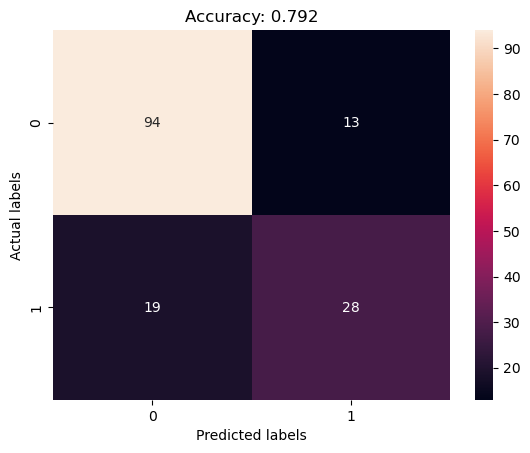

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       107
           1       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154



In [92]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(random_state=0)
mlp_acc = judge_clf(mlp_clf)

In [93]:
models = pd.DataFrame({
    'Model': ["Logistic Regr", "KNN", "SVM-Linear", "SVM-RBF", 
             "Naive Bayes", "Decision-Tree", "Radom Forest", "XGB",
             "MLP"],
    'Accuracy Score': [log_acc, knn_acc, lsvm_acc, ksvm_acc, 
                       naiveb_acc, dtree_acc, rfor_acc, xgb_acc, 
                       mlp_acc]
})

models.sort_values(by = 'Accuracy Score', ascending = False, ignore_index=True)

,Model,Accuracy Score
0,Logistic Regr,0.811688
1,Radom Forest,0.805195
2,XGB,0.805195
3,SVM-Linear,0.798701
4,MLP,0.792208
5,Naive Bayes,0.785714
6,SVM-RBF,0.772727
7,KNN,0.766234
8,Decision-Tree,0.733766


In [94]:
from sklearn.model_selection import cross_val_score
def perform_kfold(clf, X_train=X_train, y_train=y_train)->(float, float):
    """Performs k-fold cross validation on given data(X_train, y_train) using 
    the `clf` (aka classifier)
    
    Parameters:
    classifer : classifier obj implementing 'fit' method.
    X_train (array-like): 2D-array of input features of Training Set.
    y_train (array-like): list of target features of Training Set.
    
    Returns:
    mean_score (float): Mean of Accuracy scores after operation.
    std_score  (float): Standard Deviation of Accuracy scores.
    """
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, 
                            cv=10 #number of folds
                            )
    
    mean_score = scores.mean()
    std_score = scores.std()
    print(f"Mean Accuracy: {mean_score*100:0.3f} %")
    print(f"Standard Deviation: {std_score*100:0.3f} %")
    
    return mean_score, std_score

In [95]:
log_macc, log_std = perform_kfold(log_clf)

Mean Accuracy: 75.722 %
Standard Deviation: 5.110 %


In [96]:
knn_macc, knn_std = perform_kfold(knn_clf)

Mean Accuracy: 73.599 %
Standard Deviation: 4.850 %


In [97]:
ksvm_macc, ksvm_std = perform_kfold(ksvm)

Mean Accuracy: 74.416 %
Standard Deviation: 5.833 %


In [98]:
naiveb_macc, naiveb_std = perform_kfold(nb_clf)

Mean Accuracy: 73.614 %
Standard Deviation: 5.509 %


In [99]:
dtree_macc, dtree_std = perform_kfold(dtree_clf)

Mean Accuracy: 69.857 %
Standard Deviation: 3.139 %


In [100]:
rfor_macc, rfor_std = perform_kfold(rfor_clf)

Mean Accuracy: 74.265 %
Standard Deviation: 5.929 %


In [102]:
mlp_macc, mlp_std = perform_kfold(mlp_clf)

Mean Accuracy: 75.880 %
Standard Deviation: 5.503 %
